## ***General Idea:*** Target possible Customer for Offering Loan/Service

*********************************************************************************************

***Problem Statment*** : Maximizing Revenue by offering Term deposit service to the Max possible customer which can use the service (Call targetting these possible Customer)

# Proceedure:
<!-- #### <a id='# Data_Expolaration'> Data Expolaration</a> -->

#### [Data Expolaration](#Data_Expolaration)

    0.1 Overall Data Expolaration
    0.2 Data Seperation Based on Types

#### 1. Data Cleaning 
    1.1 Outlier Detection and Capping
    1.2 Missing Value Treatment
    1.3 Correlation Analysis

#### 2. Feature Engineering
    2.1 GeneratingNew Feature
    2.2 Zero Variance Check
    2.3 Univariate Analysis
    2.4 Bi Variate Analysi
    2.5 Feature Selection

#### 3. Model Building
    3.1 Random Forest Classifier
    3.2 DecisionTree Classifier
    3.3 Logistic Regression
    3.4 GradientBoosing Classifier (Bagging)
    3.5 XG Boost Classifier
    3.6 Stacking Classifier

#### 4. Evaluation
    4.1 Metric Evaluation (Accuracy, Precision, Recall, F1-score, ROC Curve) 
    4.2 Model Comparison
  

*******************************************************************

# Data Expolaration 

## Overall Data Expoloration 

In [1]:
 # Importing Required Libararies
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

# %matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')  #Suppressing Warnings

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

In [2]:
# Setting the pandas to view all the avialble column
pd.set_option('display.max_columns',None)

In [3]:
# Reading the data 
data = pd.read_csv("train.csv",sep=';')
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### For data Processing, Lets Create a copy dataframe for our processing so that some data we dont lost

In [6]:
df = data.copy()
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


### 0.2 Data Seperation Based on Types

Before Separting the Data Column based on its type, Seperating Dependant and Indepandant Feature Seperately

In [7]:
df_target = df[['y']]
df.drop(columns=['y'],axis=1,inplace=True)
df_target.head(2)

,y
0,no
1,no


In [8]:
df_numerical = df.select_dtypes(include=['number'])
df_numerical.head(2)

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0


In [9]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


It might some values are in Numerical in Type but the behavour is Catergorical and Vice Versa.
Verifying those data types

In [10]:
print("Numerical dataframe Cross data type Validation")
for col in df_numerical.columns:
    print(df_numerical[col].value_counts().shape , f"Feature {col}")
    
print("Categorical dataframe Cross data type Validation")
for col in df_categorical.columns:
    print(df_categorical[col].value_counts().shape, f"Feature {col}")

Numerical dataframe Cross data type Validation
(77,) Feature age
(7168,) Feature balance
(31,) Feature day
(1573,) Feature duration
(48,) Feature campaign
(559,) Feature pdays
(41,) Feature previous
Categorical dataframe Cross data type Validation
(12,) Feature job
(3,) Feature marital
(4,) Feature education
(2,) Feature default
(2,) Feature housing
(2,) Feature loan
(3,) Feature contact
(12,) Feature month
(4,) Feature poutcome


Looks Good for Both Dataframe, Still we can see **age,day,camapaign, previous and somehow duration as well** are acting like indicator variables, So we will treat like this only

In [11]:
indicator_columns = ['age','day','duration','campaign','pdays','previous']
df_indicator = df_numerical[indicator_columns]

# 1. Data Cleaning

## 1.1 Outlier Detection and Capping

### * For Numerical Featuers

In [12]:
df_numerical.describe([0.01,0.1,0.25,0.5,0.75,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
1%,23.000000,-627.000000,2.000000,11.000000,1.000000,-1.000000,0.000000
10%,29.000000,0.000000,5.000000,58.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
95%,59.000000,5768.000000,29.000000,751.000000,8.000000,317.000000,3.000000


As per the inital sight analysis, Looks like we have outlier in ***Age, balance, duration, campaign, pdays, previous***, as we can see that There is high deviation in mean and median 

Confirming with Box Plot, even indicator variable will not show any relationship

In [13]:
df_numerical.columns.to_list()

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [14]:
numerical_outliered_cols = ['age', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
for col in numerical_outliered_cols:
    fig = make_subplots(rows=1, cols=2,
                        specs=[[{"secondary_y": True}, {"secondary_y": True}]])

    # Top left
    fig.add_trace(
        go.Box(y=df_numerical[col],name="Box Plot"),
        row=1, col=1, secondary_y=True,
    )
    # Top right
    fig.add_trace(
        go.Histogram(x=df_numerical[col],name="Distribution"),
        row=1, col=2, secondary_y=True,
    )
    fig.update_layout(legend_title_text = f"Feature: {col}")

    fig.show()

Confirmed, Removing Outliers

In [16]:
import plotly.express as px
fig = px.histogram(df_numerical, x="balance")
fig.show()

In [17]:
def outlayer_capping(data=None,numerical_columns=None,mode='6sigmaa',multiplier=3,inplace=False):
    if data is None or numerical_columns is None:
        raise NotImplemented("No DataFrame passed or No Numerical Columns provided")
        return
    if inplace:
        df = data
    else:
        df = data.copy()
    for column in numerical_columns:
        stat = df[column].describe()
        # mask = breast_cancer['radius_mean'].between(stat['mean']-2*stat['std'],stat['mean']+2*stat['std'],inclusive='both')
        # IQR = stat['75%']-stat['25%']
        # value = stat['75%'] + 1.5*IQR
        if mode != '6sigma':
            df[column]=df[column].clip(lower=df[column].quantile(0.01))
            df[column]=df[column].clip(upper=df[column].quantile(0.99))
        else:
            mask  = (df[column]).le(stat['mean']-multiplier*stat['std'])
            (df[column])[mask] = stat['min']

            mask  = (df[column]).ge(stat['mean']+multiplier*stat['std'])
            (df[column])[mask] = stat['75%']
    if inplace==False:
        return df

In [18]:
df_numerical.describe([0.01,0.1,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
1%,23.000000,-627.000000,2.000000,11.000000,1.000000,-1.000000,0.000000
10%,29.000000,0.000000,5.000000,58.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
95%,59.000000,5768.000000,29.000000,751.000000,8.000000,317.000000,3.000000
99%,71.000000,13164.900000,31.000000,1269.000000,16.000000,370.000000,8.900000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [19]:
outlayer_capping(data=df_numerical,numerical_columns=df_numerical.columns.to_list()).describe([0.01,0.1,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.887660,1278.121689,15.813541,254.375993,2.691403,39.313884,0.524689
std,10.384267,2249.406970,8.310221,234.779511,2.585740,96.035004,1.457817
min,23.000000,-627.000000,2.000000,11.000000,1.000000,-1.000000,0.000000
1%,23.000000,-627.000000,2.000000,11.000000,1.000000,-1.000000,0.000000
10%,29.000000,0.000000,5.000000,58.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
95%,59.000000,5768.000000,29.000000,751.000000,8.000000,317.000000,3.000000
99%,71.000000,13164.810000,31.000000,1269.000000,16.000000,370.000000,8.810000
max,71.000000,13164.900000,31.000000,1269.000000,16.000000,370.000000,8.900000


Clearly its visible that outliers are capped, Updating Values in original data

In [20]:
outlayer_capping(data=df_numerical,numerical_columns=df_numerical.columns.to_list(),inplace=True)

Plotting Again to Visualize

In [21]:
import plotly.express as px
fig = px.histogram(df_numerical, x="balance")
fig.show()

### * For Categorical Features

In [22]:
df_categorical.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


Check for those class levels which are low in count 

In [23]:
for col in df_categorical.columns:
    print(f"Feature: {col}===>{df_categorical[col].value_counts().shape}")

Feature: job===>(12,)
Feature: marital===>(3,)
Feature: education===>(4,)
Feature: default===>(2,)
Feature: housing===>(2,)
Feature: loan===>(2,)
Feature: contact===>(3,)
Feature: month===>(12,)
Feature: poutcome===>(4,)


Looks good as we dont have single value repeating

### * Indicator Variables

We already dealed with outlayer_capping in Numerical Feature section only, so no need to go for it again.


Removing those feature from Numerical Dataframe

In [24]:
df_numerical.drop(columns=numerical_outliered_cols,axis=1,inplace=True)

## 1.2 Missing Value Treatment

### * Numerical Features

In [25]:
df_numerical.isna().sum() 

balance    0
dtype: int64

We dont have any missing values here

### * Categorical Features

In [26]:
df_categorical.isna().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
dtype: int64

Double Checking the levels

In [27]:
for col in df_categorical.columns:
    print(f"Feature:: {col}")
    print("===========================")
    print(df_categorical[col].value_counts())

Feature:: job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
Feature:: marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
Feature:: education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
Feature:: default
no     44396
yes      815
Name: default, dtype: int64
Feature:: housing
yes    25130
no     20081
Name: housing, dtype: int64
Feature:: loan
no     37967
yes     7244
Name: loan, dtype: int64
Feature:: contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
Feature:: month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477


We are Good here as well, No missing value Observed

### * For indicator Variables

In [28]:
df_indicator.isnull().sum()

age         0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

So far so Good

### 1.3 Correlation Analysis

     - Since we have only 1 feature in Numerical DataFrame, No need to perform this step

## 2. Feature Engineering 

### 2.1 New Feature Generation 

In [29]:
df_engineered = pd.DataFrame()

### * Numerical Features

In [30]:
df_numerical.head()

,balance
0,2143.0
1,29.0
2,2.0
3,1506.0
4,1.0


Let the Balance Seperate in 4 Groups
1. Poor
2. Middle_class
3. Upper_middle_class
4. Rich

In [31]:
sns.set(rc = {'figure.figsize':(15,8)})

<AxesSubplot:xlabel='balance', ylabel='Density'>

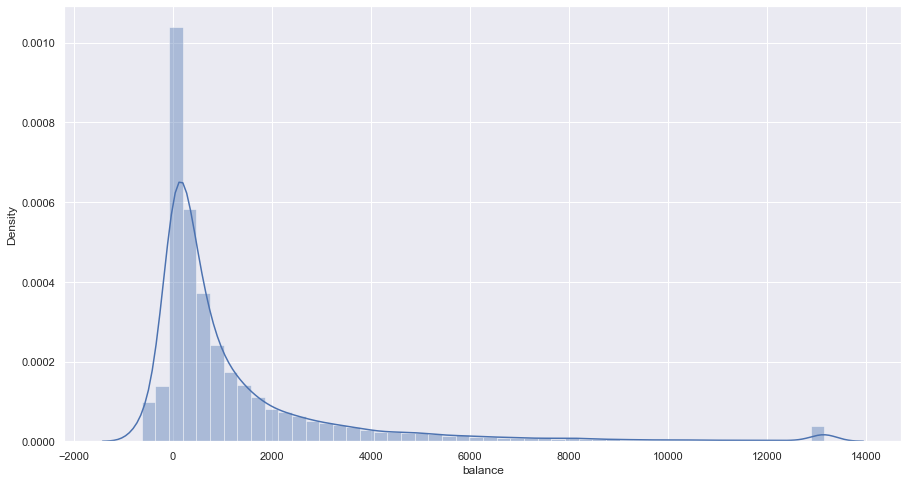

In [32]:
sns.distplot(df_numerical.balance)

Let's Understand Nature of Balance to perfectly bin it

In [33]:
df_numerical['balance_rank'] = pd.qcut(df.balance, 10,labels=False)

In [34]:
df_numerical.groupby("balance_rank").describe()

balance                                                     \
               count         mean          std     min      25%     50%   
balance_rank                                                              
0             7280.0  -139.693132   199.234640  -627.0  -240.25    -6.0   
1             1773.0     9.003948     6.589759     1.0     3.00     7.0   
2             4544.0    73.776849    31.496715    23.0    47.00    73.0   
3             4516.0   199.815766    40.604084   132.0   165.00   199.0   
4             4495.0   354.834483    50.465865   273.0   311.00   352.0   
5             4522.0   567.694825    72.801194   449.0   504.00   563.0   
6             4526.0   894.627928   121.984094   702.0   787.00   884.0   
7             4513.0  1454.024152   211.185985  1127.0  1273.00  1428.0   
8             4521.0  2592.906879   485.281503  1860.0  2166.00  2539.0   
9             4521.0  6868.574585  3038.240759  3575.0  4459.00  5768.0   

                               
                 75%      max  
balance_rank                   
0                0.0      0.0  
1               15.0     22.0  
2              100.0    131.0  
3              235.0    272.0  
4              397.0    448.0  
5              630.0    701.0  
6              994.0   1126.0  
7             1625.0   1859.0  
8             2987.0   3574.0  
9             8412.0  13164.9

In [35]:
poor = [0,1,2]
middle_class = [3,4,5]
upper_middle_class = [6,7]
rich = [8,9]

In [36]:
def balance_labelling(x):
    if x in poor:
        return 'poor'
    elif x in middle_class:
        return "middle_class"
    elif x in upper_middle_class:
        return "upper_middle_class"
    return "rich"

In [37]:
df_engineered['balance_label'] = df_numerical.balance_rank.apply(lambda x : balance_labelling(x))

### * Categorical Feature 

In [38]:
df_categorical

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


    There is a possiblity that we can do some engineering between marital and balance,loan,housing
    Need to Discuss with Souveer

### * Indicator Features

In [39]:
df_indicator.head()

,age,day,duration,campaign,pdays,previous
0,58,5,261,1,-1,0
1,44,5,151,1,-1,0
2,33,5,76,1,-1,0
3,47,5,92,1,-1,0
4,33,5,198,1,-1,0


**New Label Column for Age**

In [40]:
df_indicator.describe()

,age,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [41]:
[df_indicator['age'].values]

[array([58, 44, 33, ..., 72, 57, 37], dtype=int64)]

In [42]:
# sns.distplot(df_indicator.age)
import plotly.figure_factory as ff
fig = ff.create_distplot([df_indicator['age'].values], ['AGE'])
fig.show()

 ####   **Lets Devide age group as** 
    - Teen: (<=21)
    - Adult: (<=37, >21 )
    - Middle_age: (<=60)
    - Senior_citizen: (>60)

In [43]:
def age_labeler(x):
    if x <= 21:
        return "teen"
    elif 37 >= x > 21:
        return "adult"
    elif 60 >= x > 37:
        return "midlle_age"
    return "senior_citizen"

In [44]:
df_engineered['age_label'] = df_indicator.age.apply(lambda x: age_labeler(x))

### New feature Label for "Day" of the month

<AxesSubplot:xlabel='day', ylabel='Density'>

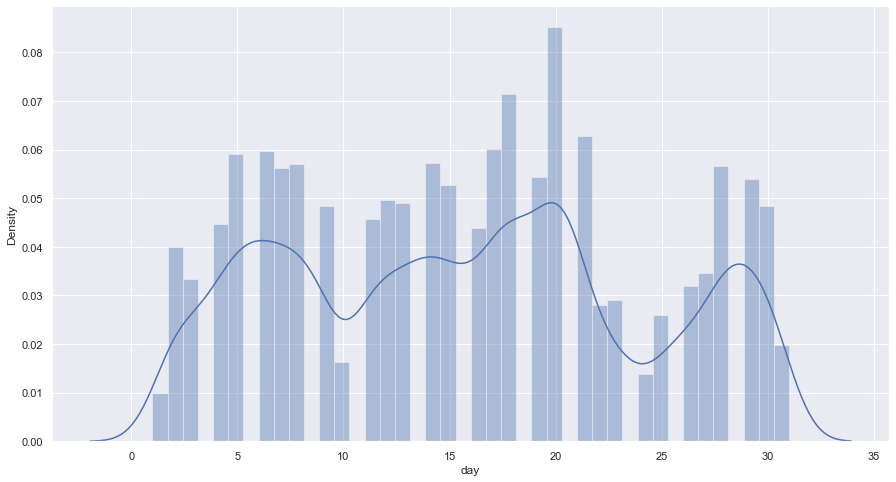

In [45]:
sns.distplot(df_indicator.day,)

#####  Making three labels for day column
    - Starting_month =  [1,11]
    - Middle_month = (11,24)
    - End_month = [24,30]

In [46]:
month_start = np.arange(1,11)
month_mid = np.arange(11,24)

In [47]:
df_engineered['day_label'] = df_indicator.day.apply(lambda x : "month_start" if x in month_start else "month_mid" if x in month_mid else "month_end")

### New feature Label for "Duration" of the month

<AxesSubplot:xlabel='duration', ylabel='Density'>

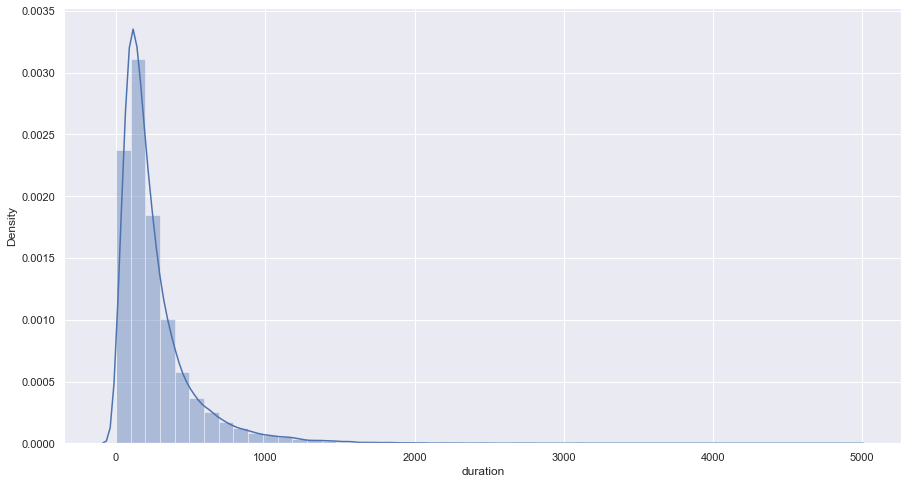

In [48]:
sns.distplot(df_indicator.duration)

In [49]:
df_indicator.duration.describe(np.arange(0,1,0.1))

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
0%           0.000000
10%         58.000000
20%         89.000000
30%        117.000000
40%        147.000000
50%        180.000000
60%        223.000000
70%        280.000000
80%        368.000000
90%        548.000000
max       4918.000000
Name: duration, dtype: float64

#### Let's label it as:

    - No_Reponse : 0
    - int_somehow : <120
    - interested_normal : 120 < x < 180
    - highly_intested : > 180

In [50]:
df_engineered['duration_label'] =  df_indicator.duration.apply(lambda x: "No_response" if x==0 else "int_somehow" if x<=120 else "interested_normal" if 120 < x < 180 else "highly_interested")

In [51]:
df_indicator


,age,day,duration,campaign,pdays,previous
0,58,5,261,1,-1,0
1,44,5,151,1,-1,0
2,33,5,76,1,-1,0
3,47,5,92,1,-1,0
4,33,5,198,1,-1,0
...,...,...,...,...,...,...
45206,51,17,977,3,-1,0
45207,71,17,456,2,-1,0
45208,72,17,1127,5,184,3
45209,57,17,508,4,-1,0


### New feature Label for "Pdays" of the month

<AxesSubplot:xlabel='pdays', ylabel='Density'>

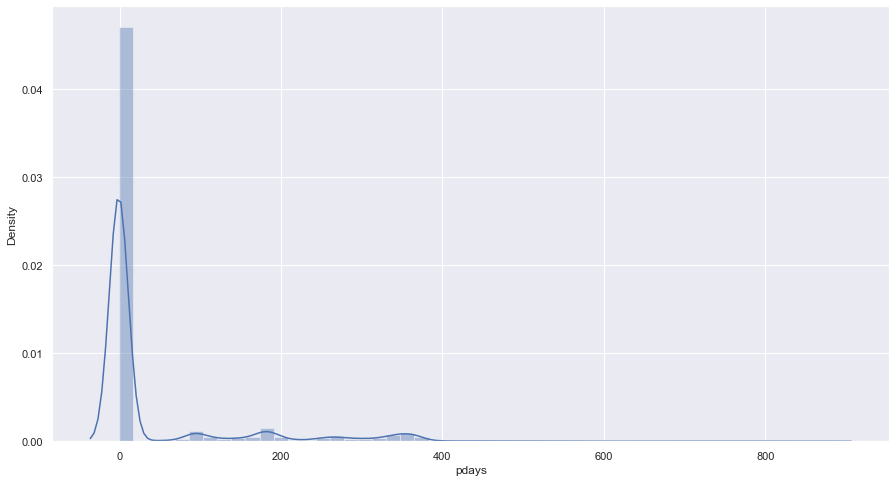

In [52]:
sns.distplot(df_indicator.pdays)

In [53]:
df.pdays.describe(np.arange(0,1,0.1))

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
0%          -1.000000
10%         -1.000000
20%         -1.000000
30%         -1.000000
40%         -1.000000
50%         -1.000000
60%         -1.000000
70%         -1.000000
80%         -1.000000
90%        185.000000
max        871.000000
Name: pdays, dtype: float64

In [54]:
uv = df_indicator.pdays.unique()
uv

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [55]:
uv.sort()
uv

array([ -1,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,
        14,  15,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

 ####  **Let's Label this one as: (Needs to be discussed: Business needs to Answer, how the frequently the compaign takes place also till which date, the column is representing the counting)**
- never_contacted : -1
- recent_month : <=30
- last3_month : 30 <= x < 90
- last6_month : 90 <= x < 180
- last9_month : 180 <= x < 270
- last_year : 270 <= x < 365
- last2_year : 365 <= x < 730
- long_back : >=730

In [56]:
df_engineered['pdays_label'] = df_indicator.pdays.apply(
    lambda x: "never" if x == -1 else "recent_month"
    if 30 <= x < 90 else "last3_month" if 90 <= x < 120 else "last6_month"
    if 120 <= x < 180 else "last9_month" if 180 <= x < 270 else "last_year"
    if 270 <= x < 365 else "last2_year" if 365 <= x < 730 else "long_time")

### New feature Label for "Campaign" of the month

<AxesSubplot:xlabel='campaign', ylabel='Density'>

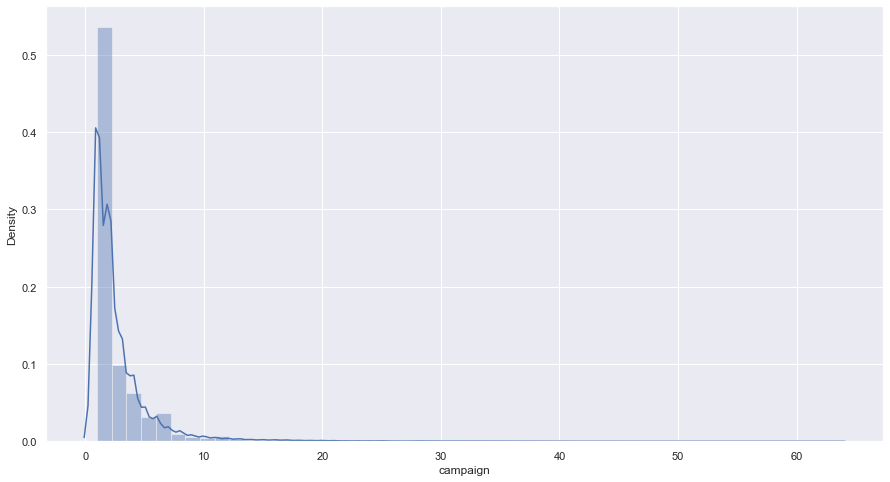

In [57]:
sns.distplot(df_indicator.campaign)

In [58]:
df_indicator.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

 #####   Labelling this as:
    - low_call : <12
    - mid_call : 12 <= x < 30
    - more_call : >= 30

In [59]:
df_engineered['campaign_label']  = df_indicator.campaign.apply(lambda x: "low_calls" if x <12 else "mid_call" if 12 <= x < 30 else "more_calls" )

### New feature Label for "Pdays" of the month

<AxesSubplot:xlabel='previous', ylabel='Density'>

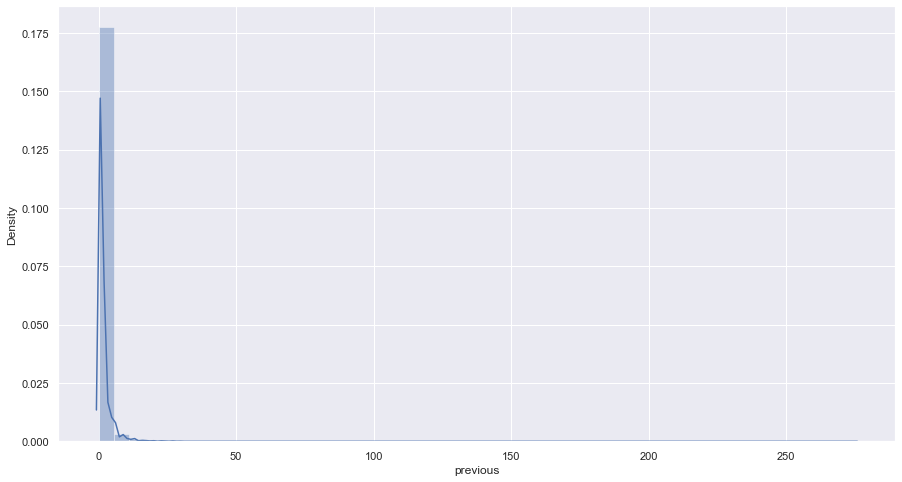

In [60]:
sns.distplot(df_indicator.previous)

In [61]:
uv = df_indicator.previous.unique()
uv.sort()
uv

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  32,  35,  37,  38,  40,  41,  51,  55,
        58, 275], dtype=int64)

In [62]:
np.median(uv)

20.0

 #####   Labelling this as:
    - No_calls : 0 
    - less_calls : <20
    - more_calls : >=20
 

In [63]:
df_engineered['previous_label'] = df_indicator.previous.apply(lambda x: "no_calls" if x==0 else "less_calls" if x<20 else "more_calls")

### 2.2 Zero Variance Check 

##### *For Numerical Features

In [64]:
df_numerical.head()

,balance,balance_rank
0,2143.0,8
1,29.0,2
2,2.0,1
3,1506.0,7
4,1.0,1


As we dont require balance Rank, it  was used previously to label balance features, So dropping it here
Also as we can see only 1 numerical column present here, and also this does not has zero variance(as per my distplot). We are good here

In [65]:
df_numerical.drop(columns='balance_rank',axis=1,inplace=True)

##### *For Indicator Features

In [66]:
df_indicator.head()

,age,day,duration,campaign,pdays,previous
0,58,5,261,1,-1,0
1,44,5,151,1,-1,0
2,33,5,76,1,-1,0
3,47,5,92,1,-1,0
4,33,5,198,1,-1,0


In [67]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit_transform(df_indicator)

array([[  58,    5,  261,    1,   -1,    0],
       [  44,    5,  151,    1,   -1,    0],
       [  33,    5,   76,    1,   -1,    0],
       ...,
       [  72,   17, 1127,    5,  184,    3],
       [  57,   17,  508,    4,   -1,    0],
       [  37,   17,  361,    2,  188,   11]], dtype=int64)

Looks all feature are above variance Threshold, As we remember these behaviour are like Categorical

#### *For Categorical Variable, Varaince threshold cant be performed

### 2.3 Univariate Analysis

Before Going to another analysis, Lets Label Encode the target as we have binary value only

In [68]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_target['y'] = le.fit_transform(df_target)
df_target.head()

,y
0,0
1,0
2,0
3,0
4,0


Not Required Univariate Analysis: Just Data Insight

### 2.4 Bi Variate Analysis

#### *For Numerical Features
    

In [69]:
from sklearn.preprocessing import KBinsDiscretizer

discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(df_numerical),index=df_numerical.index, columns=df_numerical.columns).add_suffix('_Rank')
num_binned.head()

,balance_Rank
0,8.0
1,2.0
2,1.0
3,7.0
4,1.0


In [70]:
df_numerical_binned = pd.concat([num_binned,df_target],axis=1)

<AxesSubplot:xlabel='balance_Rank', ylabel='y'>

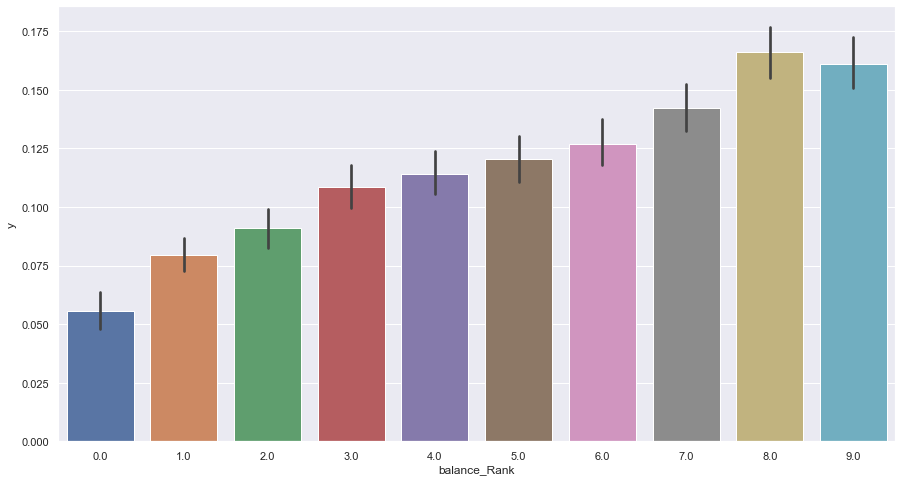

In [71]:
sns.barplot(x='balance_Rank',y='y',data=df_numerical_binned,estimator=np.mean)

     Slope Indicate its good for predictor: **balance** Accepted from Numerical Features

#### *For Indicator Features

In [72]:
from sklearn.preprocessing import KBinsDiscretizer

discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
indicator_binned=pd.DataFrame(discrete.fit_transform(df_indicator),index=df_indicator.index, columns=df_indicator.columns).add_suffix('_Rank')
df_indicator_binned = pd.concat([indicator_binned,df_target],axis=1)
df_indicator_binned.head()

,age_Rank,day_Rank,duration_Rank,campaign_Rank,pdays_Rank,previous_Rank,y
0,9.0,1.0,6.0,0.0,0.0,0.0,0
1,6.0,1.0,4.0,0.0,0.0,0.0,0
2,2.0,1.0,1.0,0.0,0.0,0.0,0
3,7.0,1.0,2.0,0.0,0.0,0.0,0
4,2.0,1.0,5.0,0.0,0.0,0.0,0


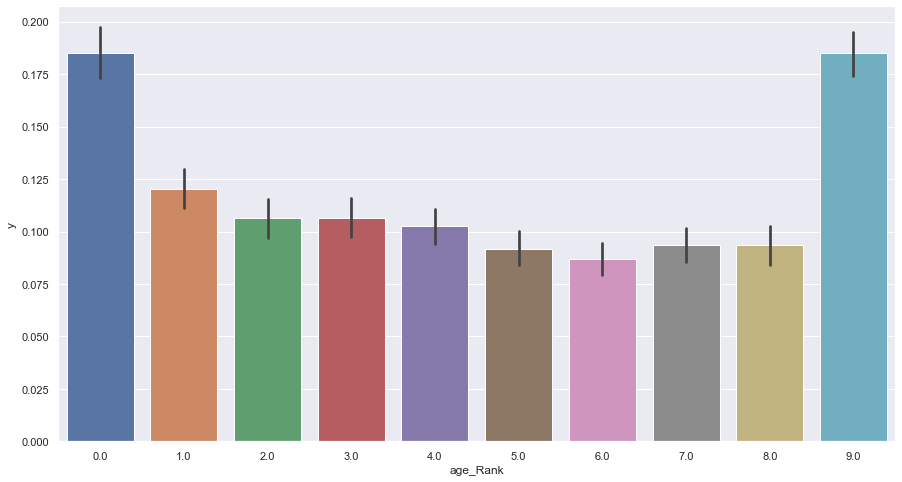

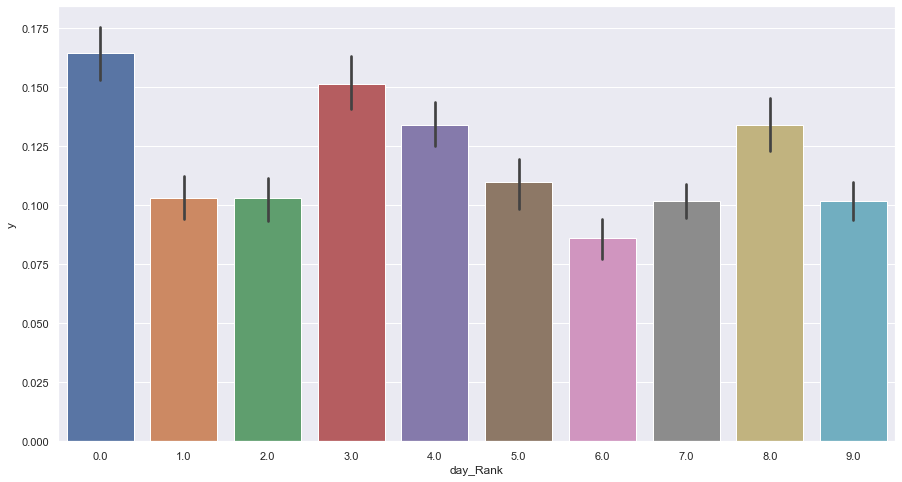

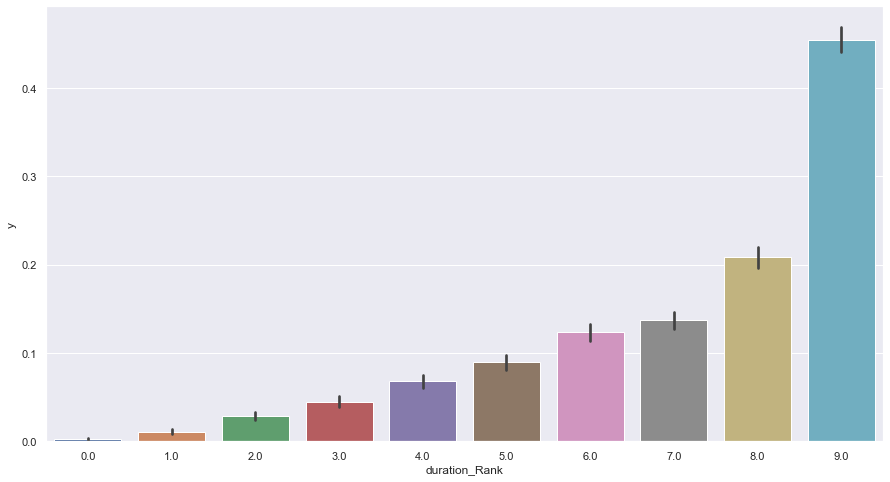

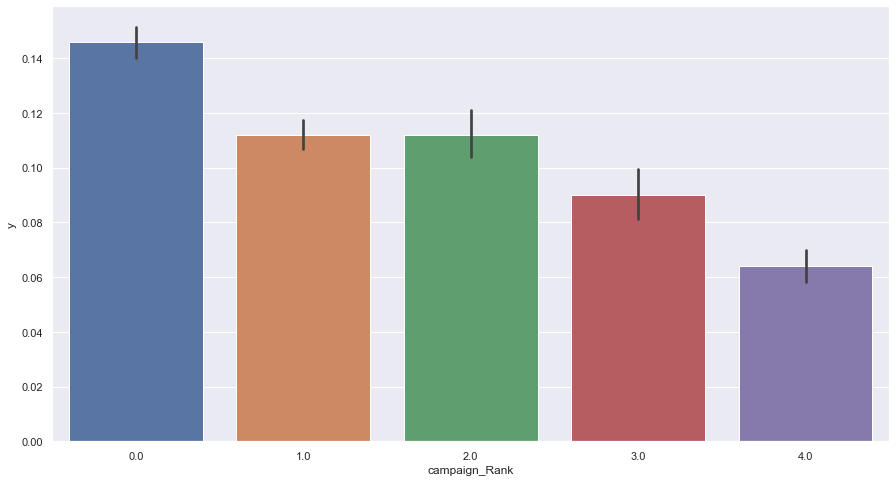

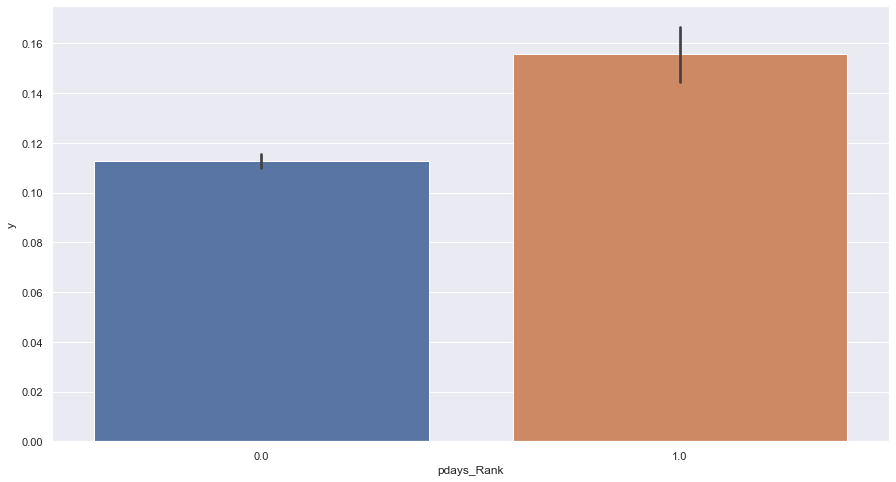

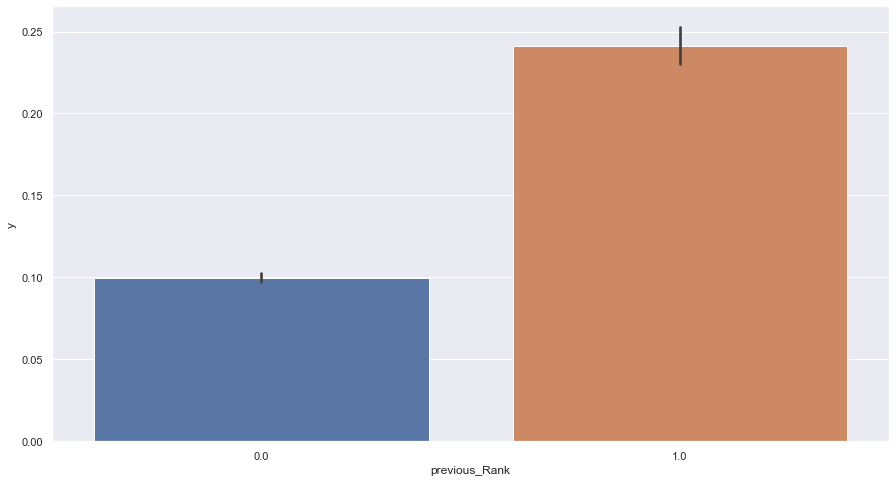

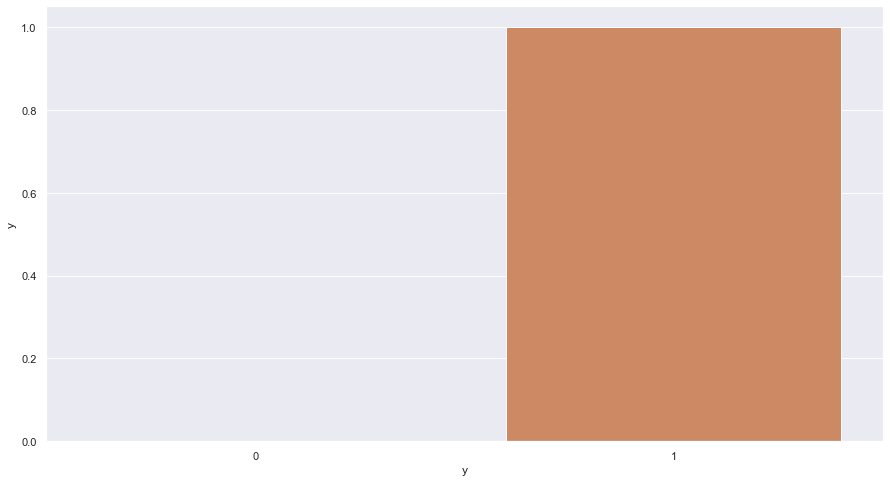

In [73]:
for col in df_indicator_binned.columns:
    plt.figure()
    sns.barplot(x=col,y='y',data=df_indicator_binned,estimator=np.mean)
plt.show()

    - Looks like "pdays" is not good varible to discreminate so lets drop it

In [74]:
df_indicator.drop(columns='pdays',axis=1,inplace=True)

#### * For Categorical Feature

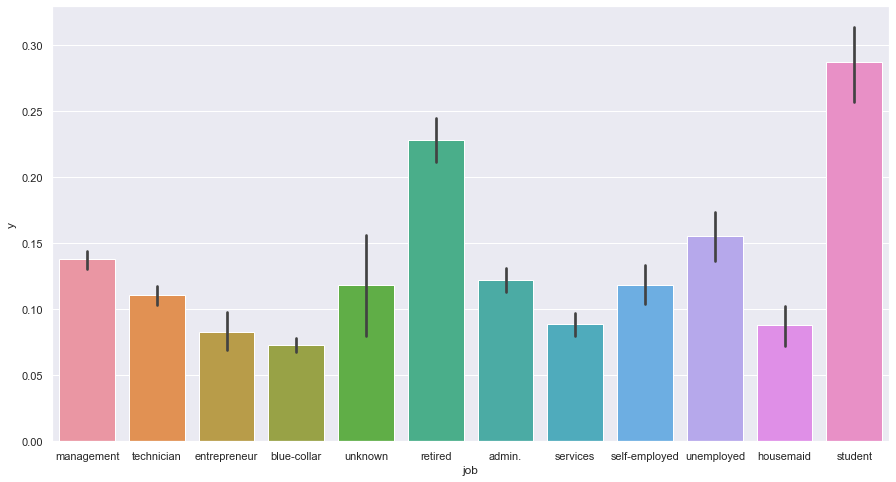

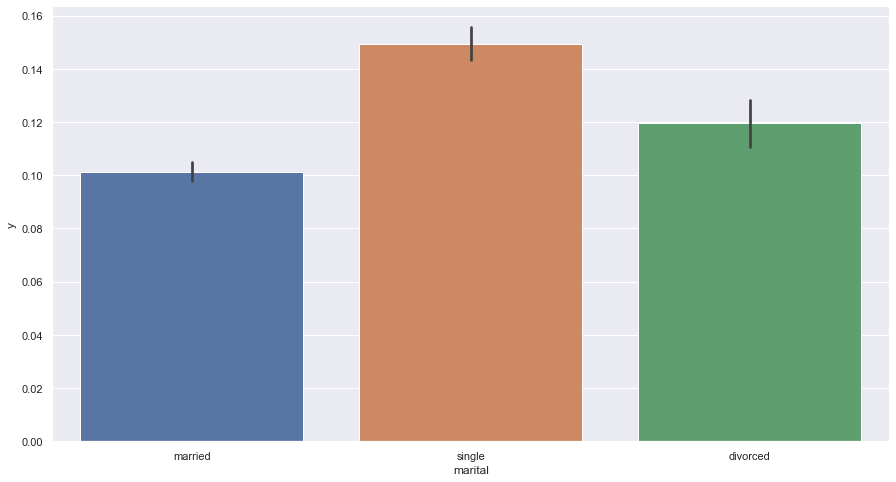

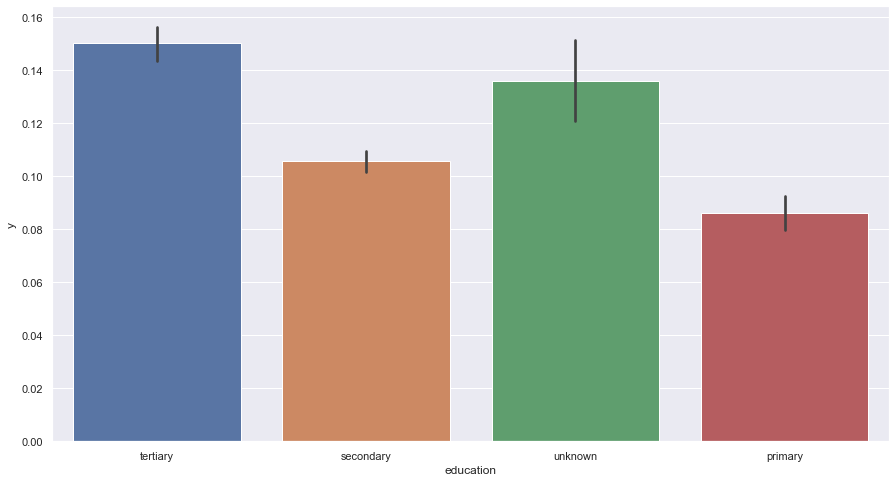

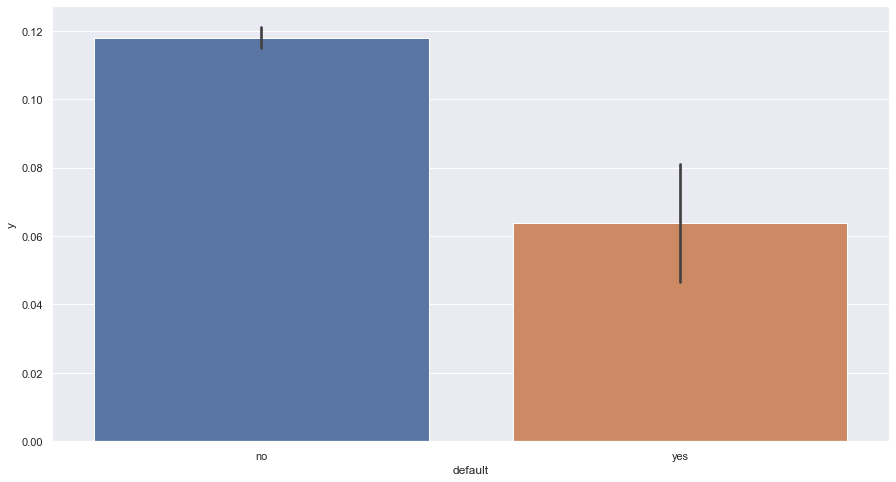

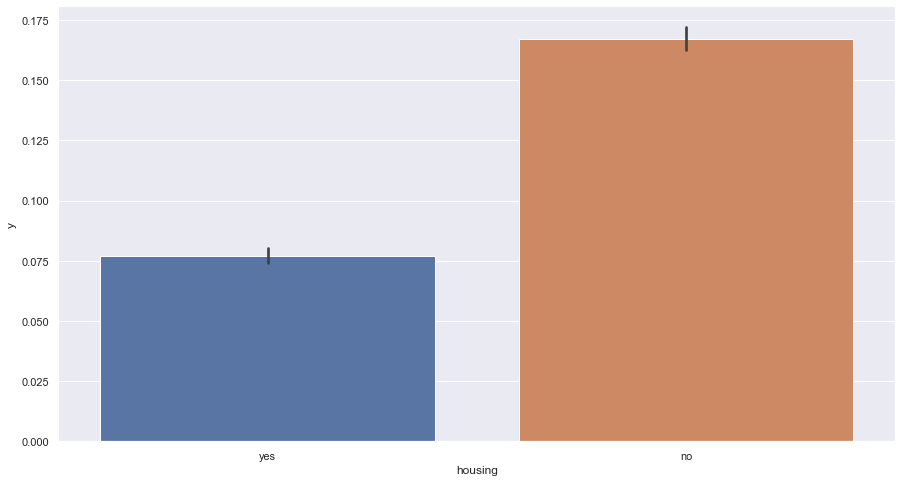

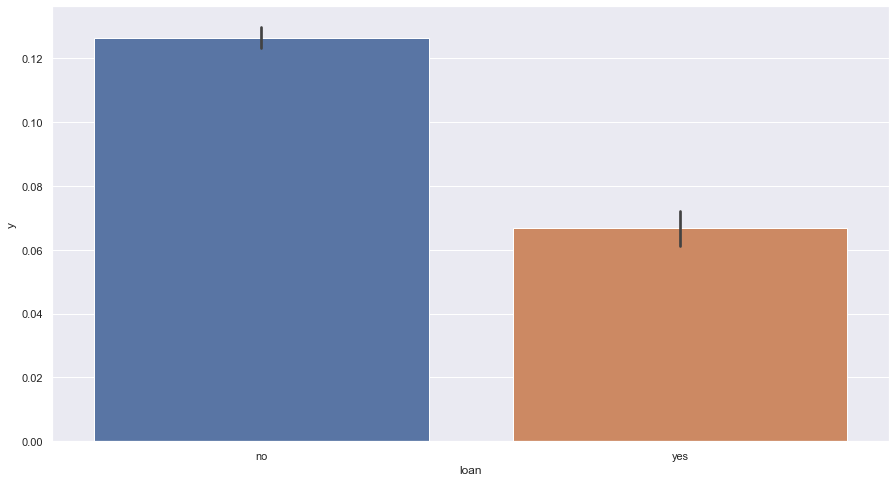

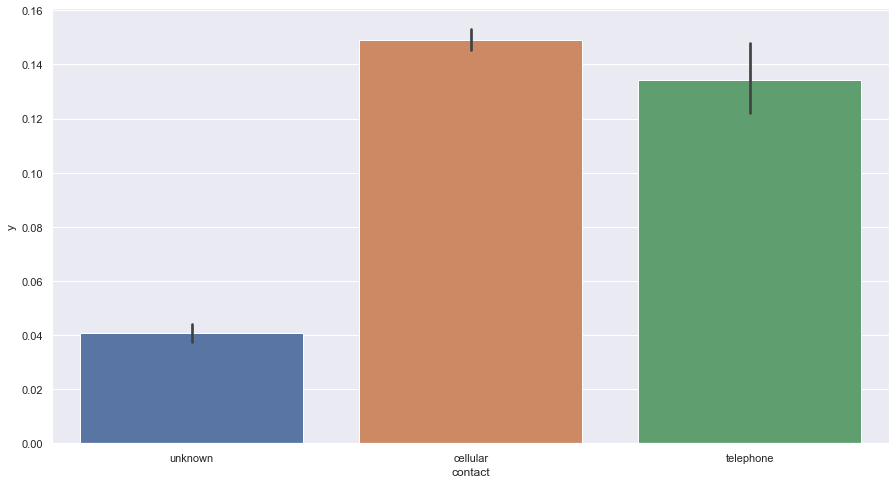

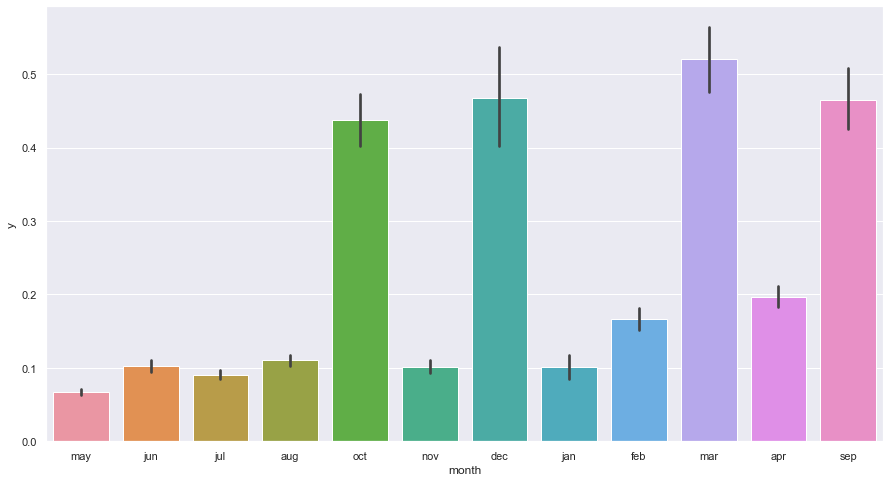

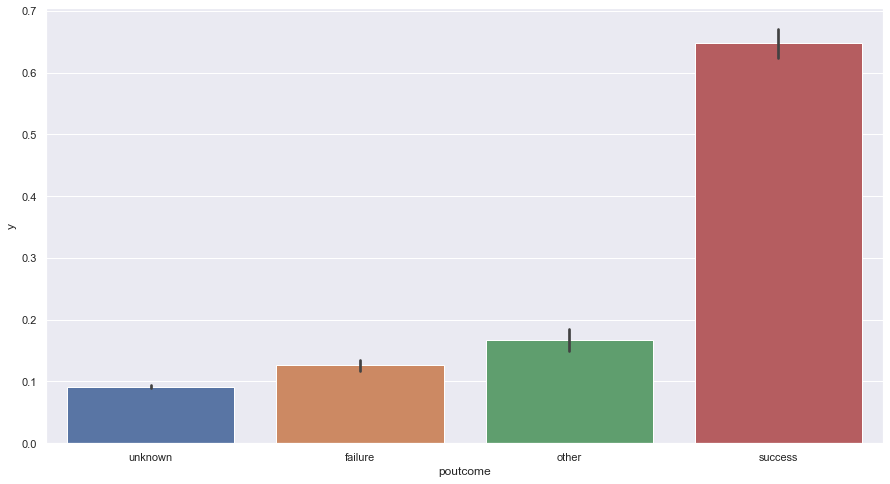

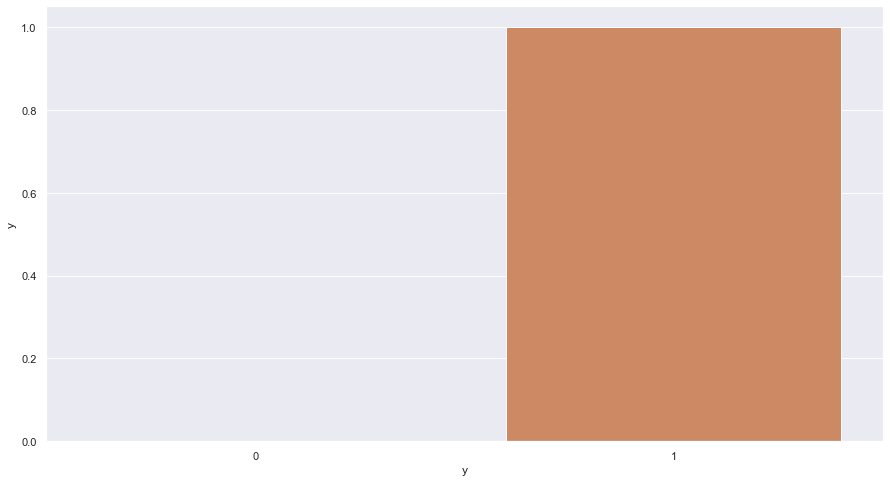

In [75]:
df_categorical_merged = pd.concat([df_categorical,df_target],axis=1)

for col in (df_categorical_merged.columns):
    plt.figure()
    sns.barplot(x=col, y="y",data=df_categorical_merged, estimator=np.mean )
plt.show()

     Looks all good predictor here; Retaining all in categorical Features

#### *Small Look on Engineered Columns

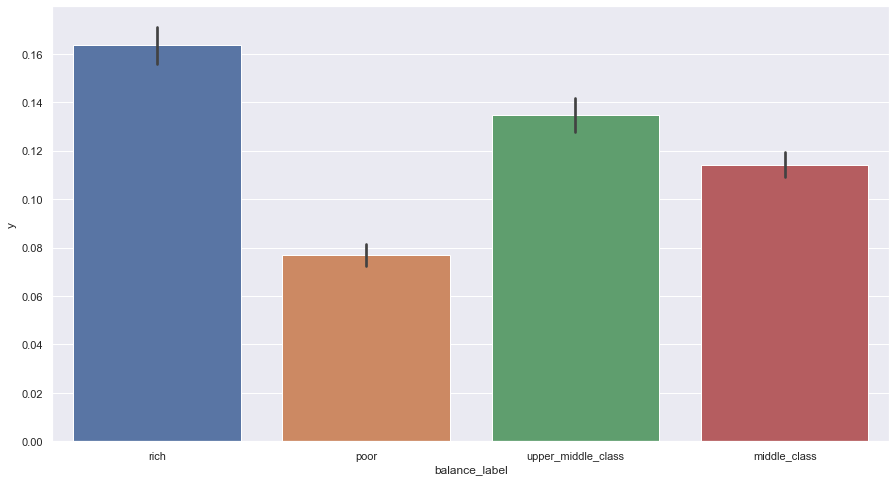

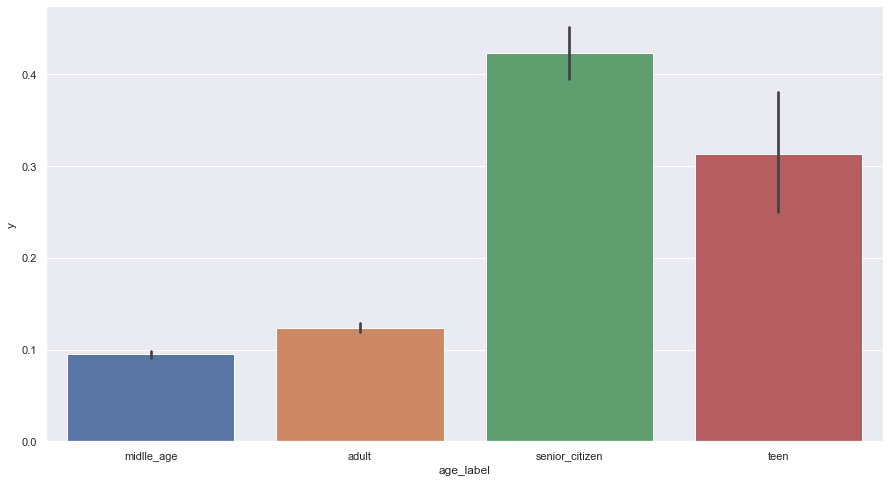

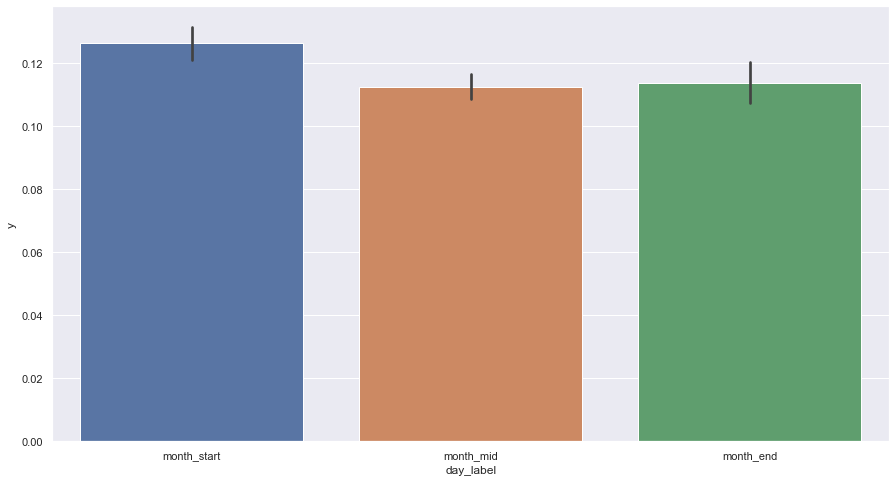

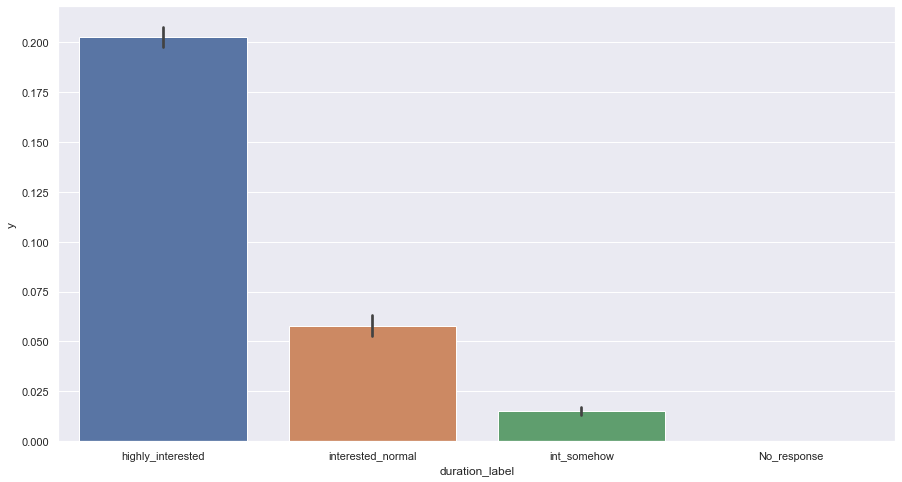

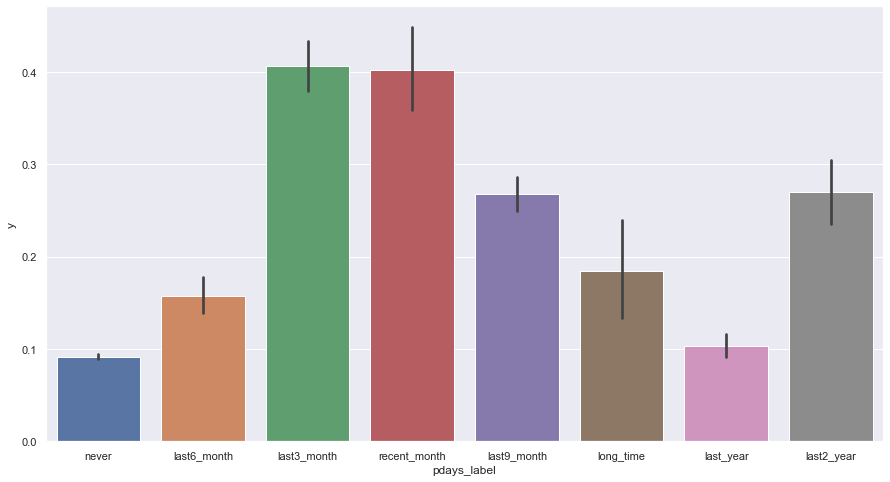

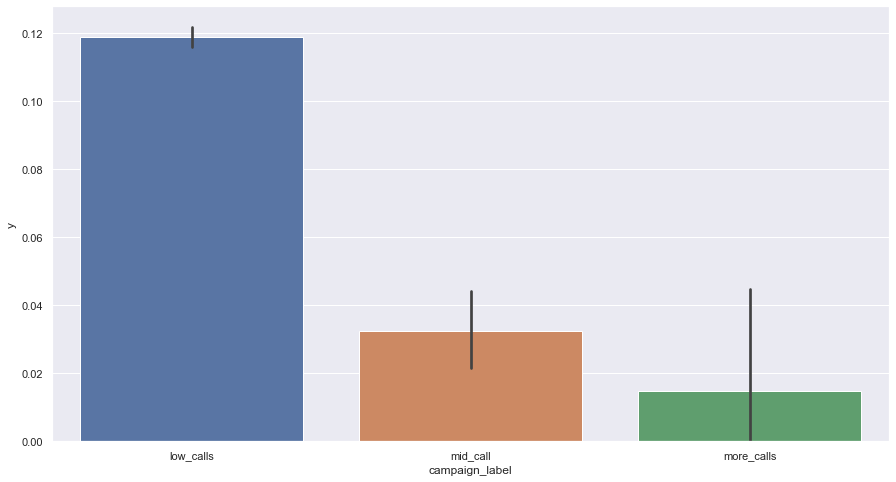

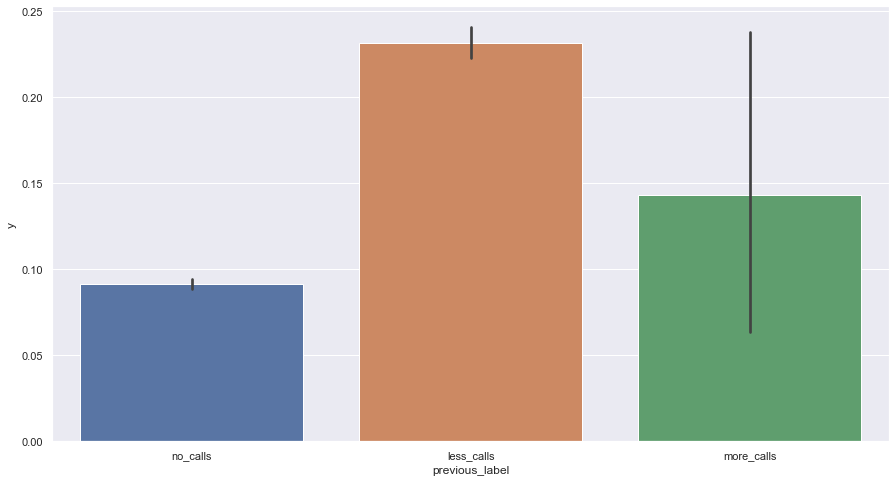

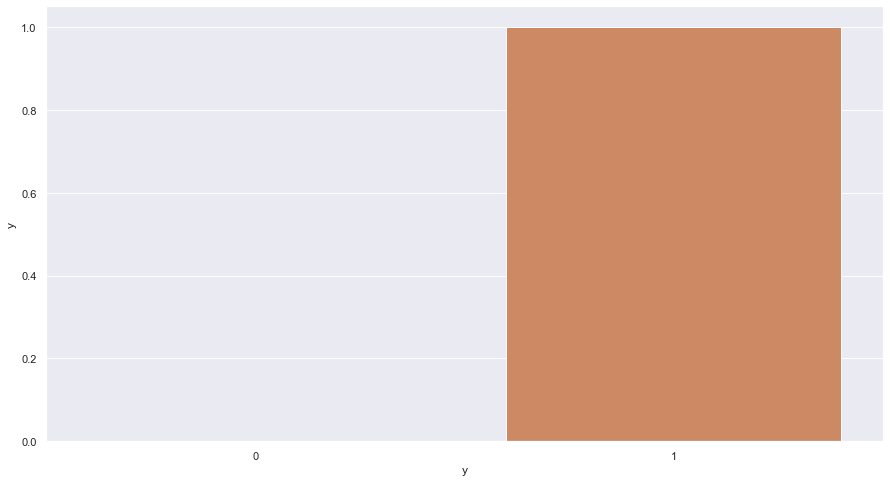

In [76]:
df_engineered_merged = pd.concat([df_engineered,df_target],axis=1)

for col in (df_engineered_merged.columns):
    plt.figure()
    sns.barplot(x=col, y="y",data=df_engineered_merged, estimator=np.mean )
plt.show()

    The Only Column "Day_Label" Does not Represent any slope and it should be removed

In [77]:
df_engineered.drop(columns='day_label',axis=1,inplace=True)

### 2.5 Feature Selection

#### *For Numerical Features

In [78]:
# from sklearn.feature_selection import SelectKBest,chi2

# features = SelectKBest(chi2,k=1).fit_transform(df_numerical,df_target)
# features

# As we dont have much column here to select K < length. Also we have Balance In Negative(causing issue)
# (Skipping for Numerical Features)

#### *For Indicator Features + Categorical Features + Engineered Features

In [79]:
df_categorical_final = pd.concat([df_categorical,df_indicator,df_engineered],axis=1)

    - For selecting K-Best Feature the X should be negative so lets replace -1 with Max value of pdays column.
    - WHY: -1 shows Never Contacted as replacing the value with max number means that it contacted long back, which will be statistically same ('_')

In [80]:
# df_indicator.pdays.replace(to_replace=-1,value=df_indicator.pdays.max(),inplace=True)

In [81]:
from sklearn.feature_selection import SelectKBest,chi2

features = SelectKBest(chi2,k=4)
features.fit_transform(df_indicator,df_target)
final_columns = df_indicator.iloc[:,features.get_support(indices=True).tolist()].columns
final_columns

Index(['day', 'duration', 'campaign', 'previous'], dtype='object')

In [82]:
# Removed Columns 
[item for item in df_indicator.columns if item not in final_columns]

['age']

    Since we have less feature and also #Age# was taking part in prediction, we are not removing here any columns

#### *For Categorical  Features

### One Hot Encoding

In [91]:
pd.concat([df_numerical,df_categorical_final,df_target],axis=1)

,balance,job,marital,education,default,housing,loan,contact,month,poutcome,age,day,duration,campaign,previous,balance_label,age_label,duration_label,pdays_label,campaign_label,previous_label,y
0,2143.0,management,married,tertiary,no,yes,no,unknown,may,unknown,58,5,261,1,0,rich,midlle_age,highly_interested,never,low_calls,no_calls,0
1,29.0,technician,single,secondary,no,yes,no,unknown,may,unknown,44,5,151,1,0,poor,midlle_age,interested_normal,never,low_calls,no_calls,0
2,2.0,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,33,5,76,1,0,poor,adult,int_somehow,never,low_calls,no_calls,0
3,1506.0,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,47,5,92,1,0,upper_middle_class,midlle_age,int_somehow,never,low_calls,no_calls,0
4,1.0,unknown,single,unknown,no,no,no,unknown,may,unknown,33,5,198,1,0,poor,adult,highly_interested,never,low_calls,no_calls,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825.0,technician,married,tertiary,no,no,no,cellular,nov,unknown,51,17,977,3,0,upper_middle_class,midlle_age,highly_interested,never,low_calls,no_calls,1
45207,1729.0,retired,divorced,primary,no,no,no,cellular,nov,unknown,71,17,456,2,0,upper_middle_class,senior_citizen,highly_interested,never,low_calls,no_calls,1
45208,5715.0,retired,married,secondary,no,no,no,cellular,nov,success,72,17,1127,5,3,rich,senior_citizen,highly_interested,last9_month,low_calls,less_calls,1
45209,668.0,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,57,17,508,4,0,middle_class,midlle_age,highly_interested,never,low_calls,no_calls,0


In [83]:
df_categorical_encoded = pd.get_dummies(df_categorical_final, drop_first = True)
df_categorical_encoded.head()

,age,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,balance_label_poor,balance_label_rich,balance_label_upper_middle_class,age_label_midlle_age,age_label_senior_citizen,age_label_teen,duration_label_highly_interested,duration_label_int_somehow,duration_label_interested_normal,pdays_label_last3_month,pdays_label_last6_month,pdays_label_last9_month,pdays_label_last_year,pdays_label_long_time,pdays_label_never,pdays_label_recent_month,campaign_label_mid_call,campaign_label_more_calls,previous_label_more_calls,previous_label_no_calls
0,58,5,261,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,44,5,151,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,33,5,76,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,47,5,92,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,33,5,198,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [84]:
df_categorical_encoded.shape

(45211, 60)

In [85]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=60)
selector.fit_transform(df_categorical_encoded, df_target)
# Get columns to keep and create new dataframe with those only

df_categorical_encoded_selected = df_categorical_encoded.iloc[:,selector.get_support(indices=True)]

In [86]:
df_categorical_encoded_selected.head(3)

,age,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,balance_label_poor,balance_label_rich,balance_label_upper_middle_class,age_label_midlle_age,age_label_senior_citizen,age_label_teen,duration_label_highly_interested,duration_label_int_somehow,duration_label_interested_normal,pdays_label_last3_month,pdays_label_last6_month,pdays_label_last9_month,pdays_label_last_year,pdays_label_long_time,pdays_label_never,pdays_label_recent_month,campaign_label_mid_call,campaign_label_more_calls,previous_label_more_calls,previous_label_no_calls
0,58,5,261,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,44,5,151,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,33,5,76,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


## Features Assemble

In [92]:
X = pd.concat([df_numerical,df_categorical_encoded_selected],axis=1)
y = df_target['y']

In [93]:
# if one hot encoding is not performed
X = pd.concat([df_numerical,df_categorical_final],axis=1)

In [94]:
# For Avoiding all other process
pd.concat([X,y],axis=1).to_csv("processed_raw.csv",index=False)

## 3. Model Building

In [103]:
X = pd.read_csv("processed.csv")
y = X['y']
X.drop(columns='y',axis=1,inplace=True)

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, shuffle=True, random_state=37)

In [105]:
# With Standerdized
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y,test_size=0.3,shuffle=True,random_state=29)

### 3.1 RandomForest Classifier

#### *Nos of Estimator Selection

OOB(Out of bag error will be used to select the no of estimators(tree))

In [106]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=17)

In [110]:
rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf.set_params(n_estimators=i)
    rf.fit(X_train, y_train)

    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error

In [111]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

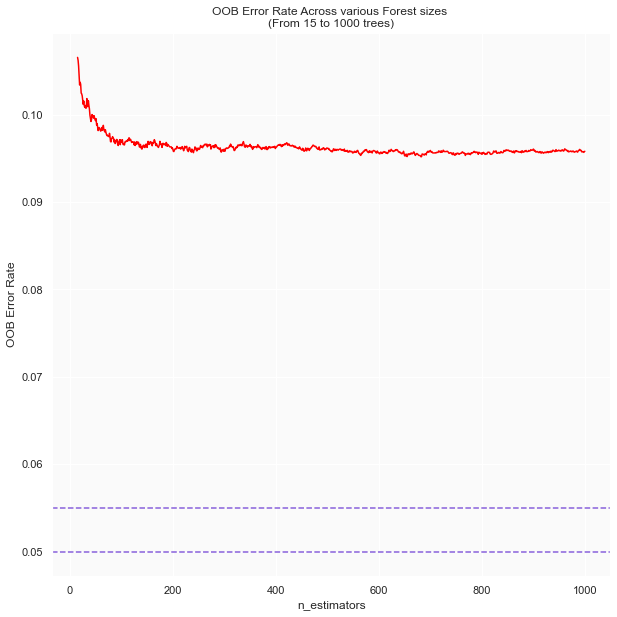

In [112]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [114]:
rf.set_params(n_estimators=200,oob_score=False)

RandomForestClassifier(n_estimators=200, random_state=17, warm_start=True)

In [115]:
from sklearn.model_selection import GridSearchCV

param_dist = {'bootstrap': [True,False], 'criterion': ['gini','entropy'],'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 250, 500],'min_samples_leaf': [10,15,30,45,60] }

tree_grid = GridSearchCV(rf, cv = 5, param_grid=param_dist,n_jobs = 3,verbose=4)
tree_grid.fit(X_train,y_train) 

print('Best Parameters using grid search: \n', tree_grid.best_params_)
print("Best Score", tree_grid.best_score_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 50}
Best Score 0.8949979444653702


In [147]:
CV_result = pd.DataFrame(tree_grid.cv_results_)

In [150]:
CV_result = CV_result.iloc[:,10:]

In [151]:
pd.DataFrame(tree_grid.cv_results_)[CV_result.params == tree_grid.best_params_]

AttributeError: 'DataFrame' object has no attribute 'params'

In [152]:
CV_result.describe()

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.888921,0.890634,0.889649,0.888889,0.891365,0.889892,0.001164,199.590000
std,0.004186,0.005252,0.004525,0.003868,0.005988,0.004729,0.000711,114.596872
min,0.881991,0.882148,0.882130,0.882130,0.881972,0.882137,0.000009,1.000000
25%,0.885229,0.885308,0.886001,0.886396,0.885724,0.885858,0.000367,100.750000
50%,0.890995,0.892575,0.891215,0.890662,0.893901,0.891854,0.001296,200.500000
75%,0.892101,0.894945,0.893348,0.891926,0.896824,0.893829,0.001837,300.250000
max,0.893681,0.896998,0.894770,0.893506,0.897930,0.894998,0.002260,400.000000


In [139]:
# from sklearn.model_selection import GridSearchCV

# param_dist = {'bootstrap': [False], 'criterion': ['gini'],'max_depth': [7,8,9,10], 'min_samples_split': [50, 100, 150],'min_samples_leaf': [10,15,30] }

# tree_grid = GridSearchCV(rf, cv = 3, param_grid=param_dist,n_jobs = 3,verbose=4,return_train_score=True,scoring='accuracy')
# tree_grid.fit(X_train,y_train) 

# print('Best Parameters using grid search: \n', tree_grid.best_params_)
# print("Best Score", tree_grid.best_score_)

In [153]:
rf = RandomForestClassifier(bootstrap=False,criterion='gini',max_depth=10,min_samples_leaf=15,min_samples_split=50)

In [154]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=15,
                       min_samples_split=50)

In [155]:
def feature_importance(fitted_model=None,dataFrame=None,return_top_x=None,display=True,height=400):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * return_top_x(int): Array of Features till top X which are contributing more 
    * dataframe: Dataframe required to calculated columns : This dataframe only used for training
    * fitted_model: Trained Model required

    Returns
    ----------
    Return top X feature if parameter passed
    """
    import plotly.express as px
    
    if fitted_model is None or dataFrame is None:
        raise EOFError("Failed to Load model or Root DataFrame")
    ranking = pd.DataFrame(
        {
            'features':dataFrame.columns[:-1].to_list(),
            "importance":fitted_model.feature_importances_}).sort_values('importance',ascending=True).reset_index(drop=True)
    if display:
        fig = px.bar(ranking, y='features', x='importance', text='importance',orientation='h',title="Feature Importance Table",)
        fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
        fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide',height=height)
        fig.show()
    if return_top_x is not None and return_top_x <= len(ranking['features'].to_list()):
        return ranking['features'].to_list()[:return_top_x]

In [156]:
feature_importance(fitted_model=rf,dataFrame=pd.concat([X,y],axis=1),height=800)

### 3.1 DecisionTree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(random_state=0)

In [20]:
from sklearn.model_selection import GridSearchCV
param_dist = {'criterion': ['gini','entropy'],'max_depth': [6,7,9,10,12], 'min_samples_split': [50, 100, 150, 200],'min_samples_leaf': [10,15,20,30,45] }
tree_grid = GridSearchCV(dtree, cv = 7, param_grid=param_dist,n_jobs = 3,verbose=4,return_train_score=True,scoring='accuracy')
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)
print("Best Score", tree_grid.best_score_)

Fitting 7 folds for each of 200 candidates, totalling 1400 fits
Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 30, 'min_samples_split': 100}
Best Score 0.9020444275918728


In [102]:
dtree=DecisionTreeClassifier(
    criterion='gini',
    random_state=0,
    max_depth=7,
    min_samples_split=100,
    min_samples_leaf=30)

dtree.fit(X_train,y_train)

ValueError: could not convert string to float: 'blue-collar'

##### Plotting Tree

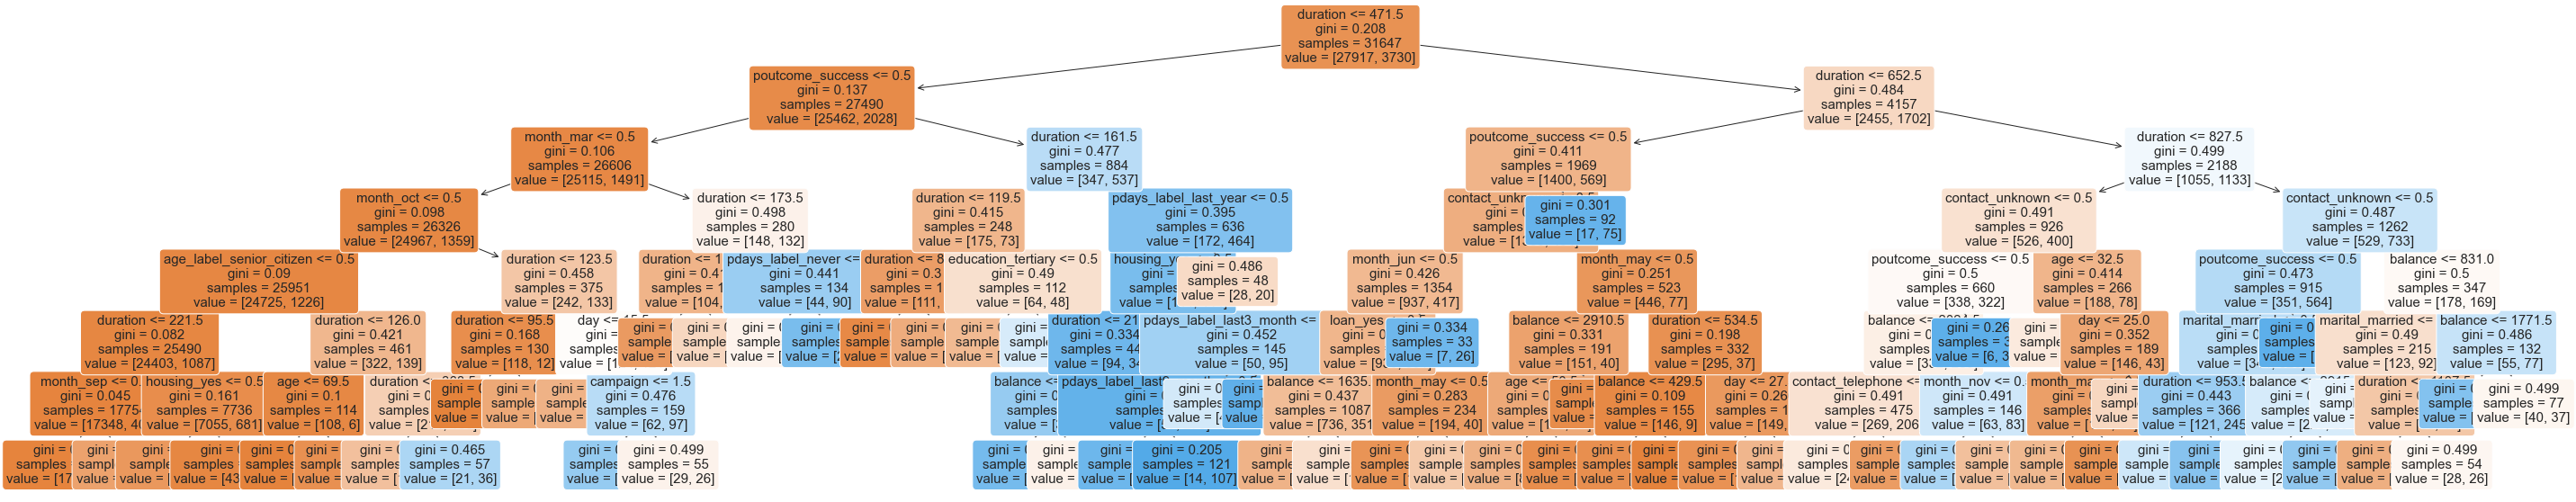

In [14]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X.columns)
plt.show()

### 3.2 Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(random_state=0)
logreg.fit(X_train_scaled,y_train_scaled)

LogisticRegression(random_state=0)

In [16]:
coeff_df=pd.DataFrame(X.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,balance,-0.059217
1,age,-0.059632
2,day,0.098694
3,duration,0.869306
4,campaign,-0.240067
...,...,...
56,pdays_label_recent_month,-0.051963
57,campaign_label_mid_call,0.069813
58,campaign_label_more_calls,0.127003
59,previous_label_more_calls,0.004834


### 3.3 GradientBoosing Classifier (Bagging)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(random_state=0)

In [28]:
from sklearn.model_selection import GridSearchCV

# param_dist = {'learning_rate': [0.001, 0.01, 0.1], 'loss': ['deviance', 'exponential'],'max_depth': [3, 5, 6, 7,10,15], 'min_samples_split': [50, 100, 150, 200, 250, 500],'min_samples_leaf': [10,15,20,30,45,60] }
param_dist = {'learning_rate': [0.1], 'loss': ['deviance'],'max_depth': [6,7,10], 'min_samples_split': [50, 100, 150],'min_samples_leaf': [20,30,45,60] }

tree_grid = GridSearchCV(gbm, cv = 5, param_grid=param_dist,n_jobs = 3,verbose=4,return_train_score=True,scoring='accuracy')
tree_grid.fit(X_train,y_train) 

print('Best Parameters using grid search: \n', tree_grid.best_params_)
print("Best Score", tree_grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters using grid search: 
 {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 50}
Best Score 0.9077322997501159


In [18]:
gbm=GradientBoostingClassifier(
    learning_rate=0.1,
    random_state=0,
    loss='deviance',
    max_depth=7,
    min_samples_split=50,
    min_samples_leaf=20)

gbm.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=7, min_samples_leaf=20,
                           min_samples_split=50, random_state=0)

### 3.4 SVC Classifer

In [19]:
from sklearn.svm import SVC
svm_clf = SVC(gamma='auto')

In [61]:
from sklearn.model_selection import GridSearchCV

param_dist = {'kernel': ['rbf' ],
              'C': [0.1, 1, 10],
              'gamma': [1, 0.1]}

tree_grid = GridSearchCV(svm_clf, cv=5, param_grid=param_dist, n_jobs=3,
                         verbose=4, return_train_score=True, scoring='accuracy')
tree_grid.fit(X_train, y_train)

print('Best Parameters using grid search: \n', tree_grid.best_params_)
print("Best Score", tree_grid.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


KeyboardInterrupt: 

In [ ]:
svm_clf = SVC(gamma='auto',c)

### 3.4 XG Boost Classifier (Boosting)

In [20]:
import xgboost as xgb

xgb = xgb.XGBClassifier(tree_method='gpu_hist')

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [6, 7,9,10],
    "learning_rate": [0.1, 0.01],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

tree_grid = GridSearchCV(xgb, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
tree_grid.fit(X_train,y_train) 

print('Best Parameters using grid search: \n', tree_grid.best_params_)
print("Best Score", tree_grid.best_score_)

[20:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters using grid search: 
 {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'reg_lambda': 10, 'scale_pos_weight': 5, 'subsample': 0.8}
Best Score 0.9328579714330479


In [21]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(
    max_depth=10, 
    learning_rate=0.1,
    gamma=1,
    reg_lambda=10,
    scale_pos_weight=5,
    subsample=0.8,
    colsample_bytree=0.5,tree_method='gpu_hist')

xgb_clf.fit(X_train,y_train)

[20:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=1, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=5, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

### 3.5 Stacking Classifier

In [25]:
base_learners = [('rf',
                  RandomForestClassifier(bootstrap=False,
                                         criterion='gini',
                                         max_depth=10,
                                         min_samples_leaf=15,
                                         min_samples_split=50)),
                 ('gbm',
                  GradientBoostingClassifier(learning_rate=0.1,
                                             random_state=0,
                                             loss='deviance',
                                             max_depth=7,
                                             min_samples_split=50,
                                             min_samples_leaf=20)),
                 ('xgb_clf',
                  xgb.XGBClassifier(max_depth=10,
                                    learning_rate=0.1,
                                    gamma=1,
                                    reg_lambda=10,
                                    scale_pos_weight=5,
                                    subsample=0.8,
                                    colsample_bytree=0.5,
                                    tree_method='gpu_hist')),
                 ('dtree',
                  DecisionTreeClassifier(criterion='gini',
                                         random_state=0,
                                         max_depth=7,
                                         min_samples_split=100,
                                         min_samples_leaf=30))]

In [26]:
from sklearn.ensemble import StackingClassifier
stack_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

stack_clf.fit(X_train, y_train)

[20:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=10,
                                                       min_samples_leaf=15,
                                                       min_samples_split=50)),
                               ('gbm',
                                GradientBoostingClassifier(max_depth=7,
                                                           min_samples_leaf=20,
                                                           min_samples_split=50,
                                                           random_state=0)),
                               ('xgb_clf',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_by

## 4. Model Evaluation 

### 4.1 Metric Evaluation (Accuracy, Precision, Recall, F1-score, ROC Curve) 

In [23]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [27]:
models = [dtree,logreg,rf,gbm,xgb_clf,stack_clf]

In [28]:
from sklearn import metrics
response = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    f1_score = metrics.f1_score(y_test,y_pred)
    
    e = {'Model':str(model),'Y_pred':y_pred, 'accuracy':accuracy, 'precision':precision,'recall':recall,'f1_score':f1_score }
    response.append(e)
    
result = pd.DataFrame(response)

In [29]:
result

,Model,Y_pred,accuracy,precision,recall,f1_score
0,"DecisionTreeClassifier(max_depth=7, min_sample...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.904232,0.641921,0.377165,0.475152
1,LogisticRegression(random_state=0),"[1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ...",0.278605,0.129326,0.920462,0.226788
2,"RandomForestClassifier(bootstrap=False, max_de...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.898776,0.759777,0.174471,0.283777
3,"GradientBoostingClassifier(max_depth=7, min_sa...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",0.906738,0.625000,0.471456,0.537477
4,"XGBClassifier(base_score=0.5, booster='gbtree'...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, ...",0.885727,0.501807,0.801796,0.617284
5,"StackingClassifier(estimators=[('rf',\n ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",0.908508,0.612288,0.556126,0.582857


In [30]:
import plotly.graph_objects as go
model_list = ['DecisionTree','LogisticReg','RandomForest','GradientBoosting','XGB','StackCLF']

fig = go.Figure(data=[
    go.Bar(name=result[item].name, x=model_list, y=result[item]) for item in result.columns[2:]
])
# Change the bar mode
fig.update_layout(barmode='group',title="Different Model Metric Comparison ",height=700)
fig.show()